#📌 Extracão

In [8]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

# Configuração para visualizações
%matplotlib inline
sns.set(style="whitegrid")

# 📌 Extração
# URL da API
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Requisição à API
response = requests.get(url)
data = response.json()

# Convertendo para DataFrame
df = pd.json_normalize(data)
print("Dados extraídos com sucesso!")
print("\nPrimeiras 5 linhas:")
print(df.head())

Dados extraídos com sucesso!

Primeiras 5 linhas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes       

#🔧 Transformação

In [9]:
# 🔧 Transformação
# Informações do dataset
print("\nInformações do Dataset:")
print(df.info())

# Colunas disponíveis
print("\nColunas disponíveis:", df.columns.tolist())

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Verificando duplicados
print("\nNúmero de duplicatas:", df.duplicated().sum())

# Verificando valores únicos em 'Churn'
print("\nValores únicos em 'Churn':", df['Churn'].unique())

# Verificando valores únicos em colunas categóricas
categorical_columns = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
                      'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                      'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                      'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                      'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']
for col in categorical_columns:
    print(f"\nValores únicos em {col}:", df[col].unique())

# Tratando valores vazios em 'Churn'
df['Churn'] = df['Churn'].replace('', np.nan)
print("\nValores ausentes em 'Churn' após tratamento:", df['Churn'].isnull().sum())

# Removendo linhas com 'Churn' ausente
df = df.dropna(subset=['Churn'])

# Convertendo colunas numéricas
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Substituindo 'No phone service' e 'No internet service' por 'No'
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace('No phone service', 'No')
for col in ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
            'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']:
    df[col] = df[col].replace('No internet service', 'No')

# Verificando tipos de dados após tratamento
print("\nTipos de dados após tratamento:")
print(df.dtypes)

# Criando coluna de Contas Diárias
df['account.Charges.Daily'] = df['account.Charges.Monthly'] / 30  # Assumindo 30 dias por mês
print("\nPrimeiras 5 linhas com Contas Diárias:")
print(df[['account.Charges.Monthly', 'account.Charges.Daily']].head())

# Convertendo variáveis categóricas binárias em 0 e 1
binary_columns = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
                  'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                  'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
                  'internet.StreamingMovies', 'account.PaperlessBilling']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Garantindo que 'customer.SeniorCitizen' seja 0 ou 1
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(int)

# Renomeando colunas
df = df.rename(columns={
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'Tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges',
    'account.Charges.Daily': 'DailyCharges'
})

print("\nColunas após renomeação:", df.columns.tolist())


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport   

/tmp/ipython-input-2017496941.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
/tmp/ipython-input-2017496941.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
/tmp/ipython-input-2017496941.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

#📊 Carga e análise


Estatísticas descritivas:
            Tenure  MonthlyCharges  TotalCharges  DailyCharges
count  7043.000000     7043.000000   7032.000000   7043.000000
mean     32.371149       64.761692   2283.300441      2.158723
std      24.559481       30.090047   2266.771362      1.003002
min       0.000000       18.250000     18.800000      0.608333
25%       9.000000       35.500000    401.450000      1.183333
50%      29.000000       70.350000   1397.475000      2.345000
75%      55.000000       89.850000   3794.737500      2.995000
max      72.000000      118.750000   8684.800000      3.958333


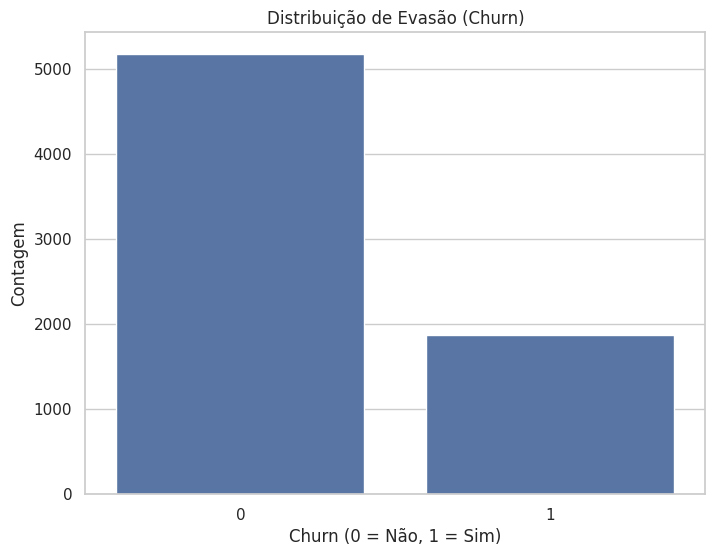

Taxa de evasão: 26.54%


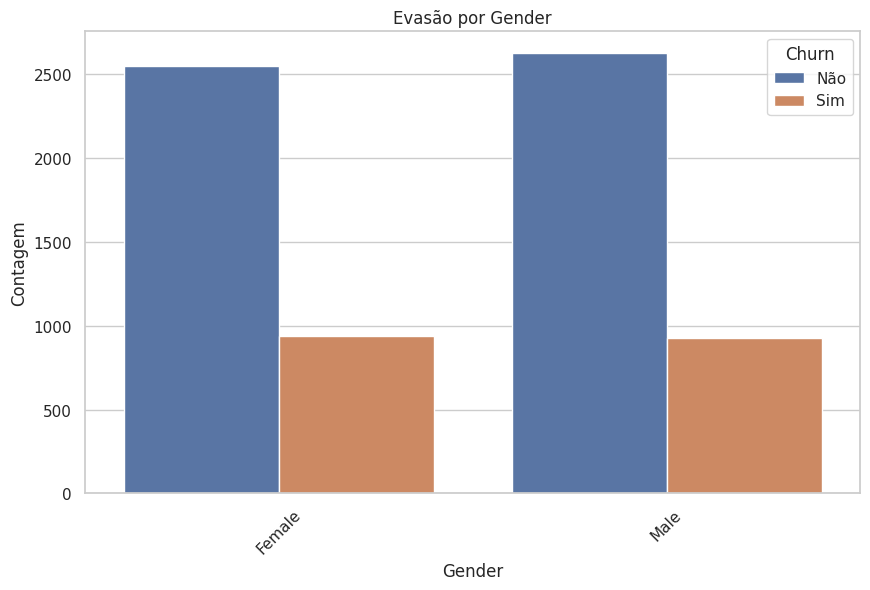

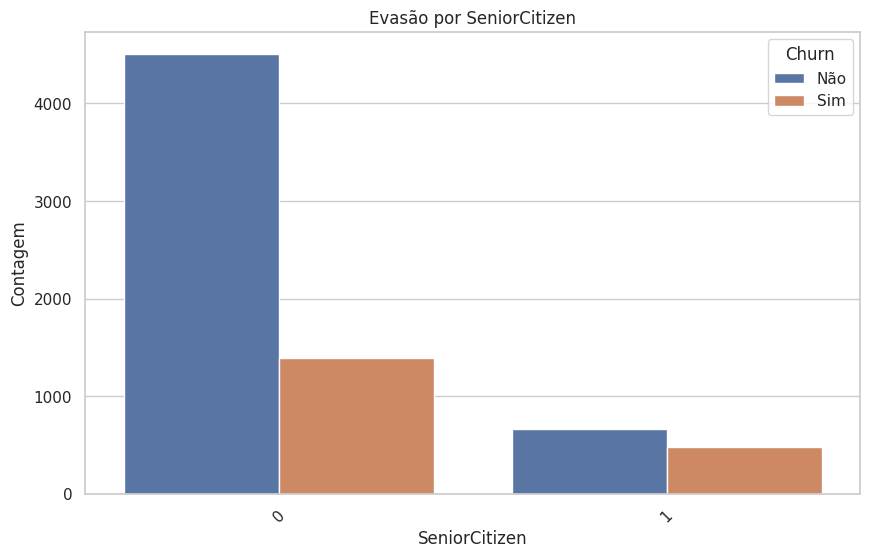

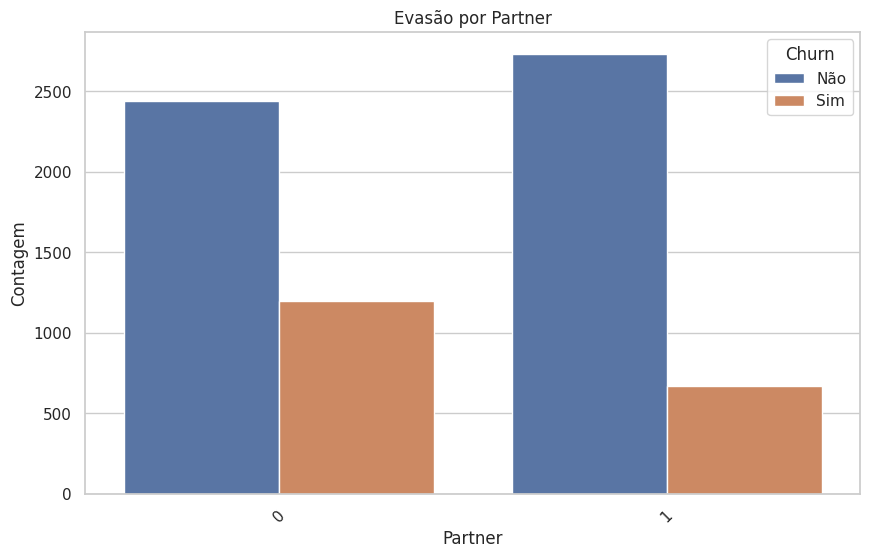

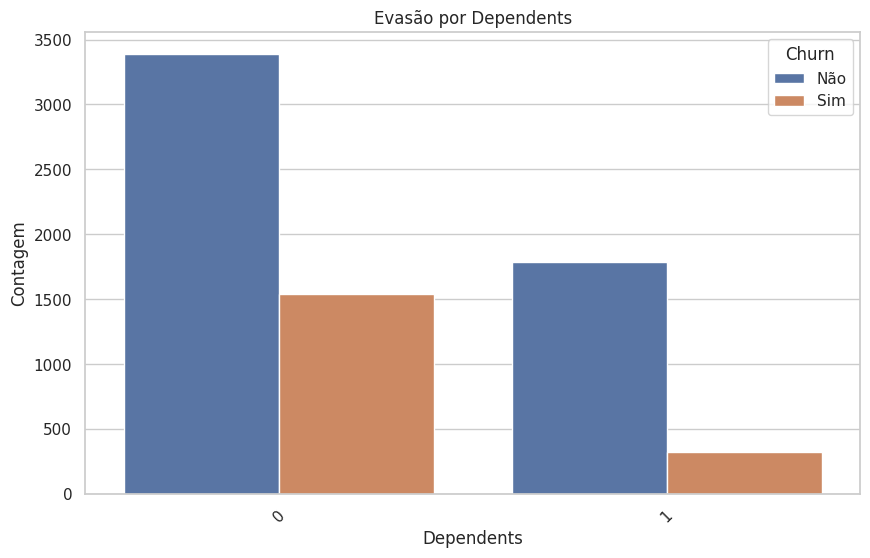

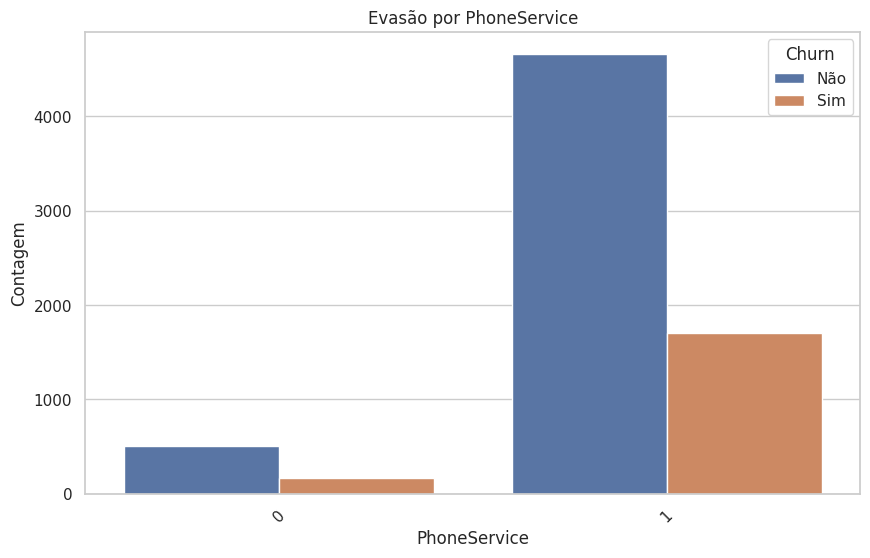

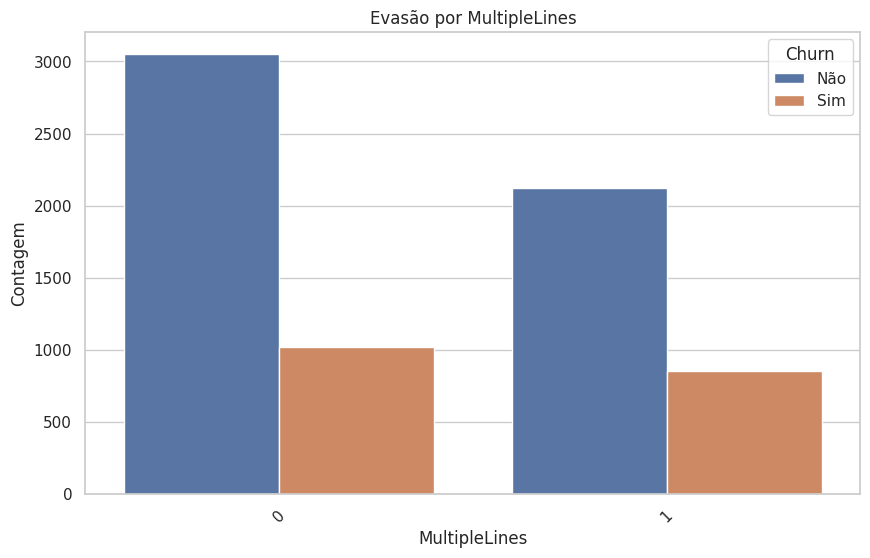

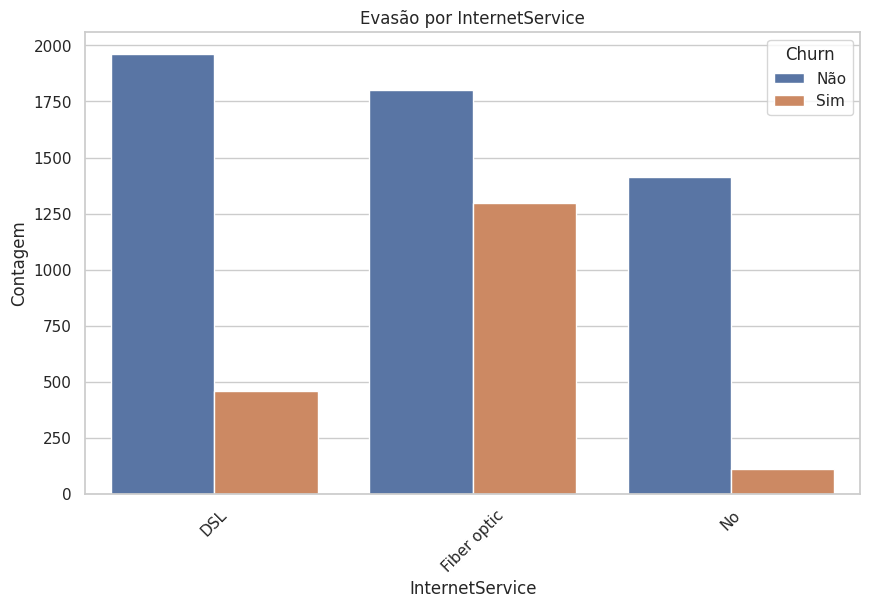

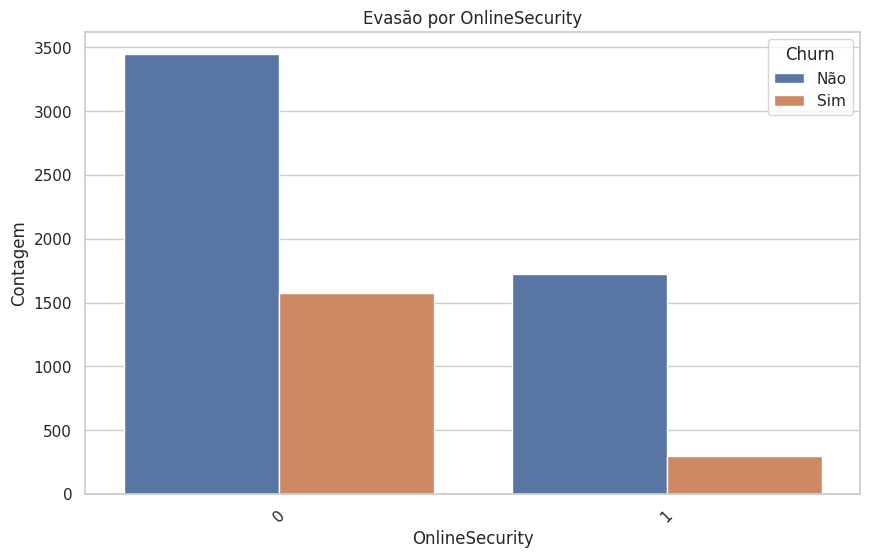

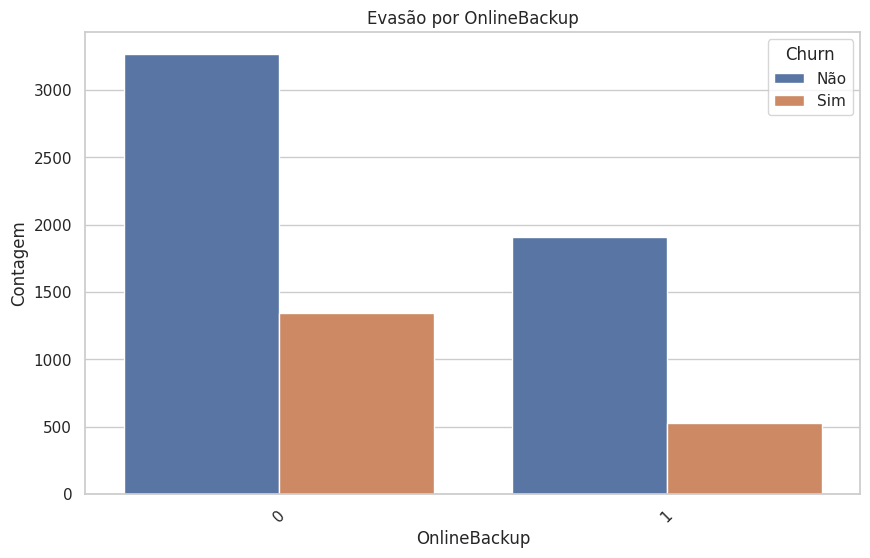

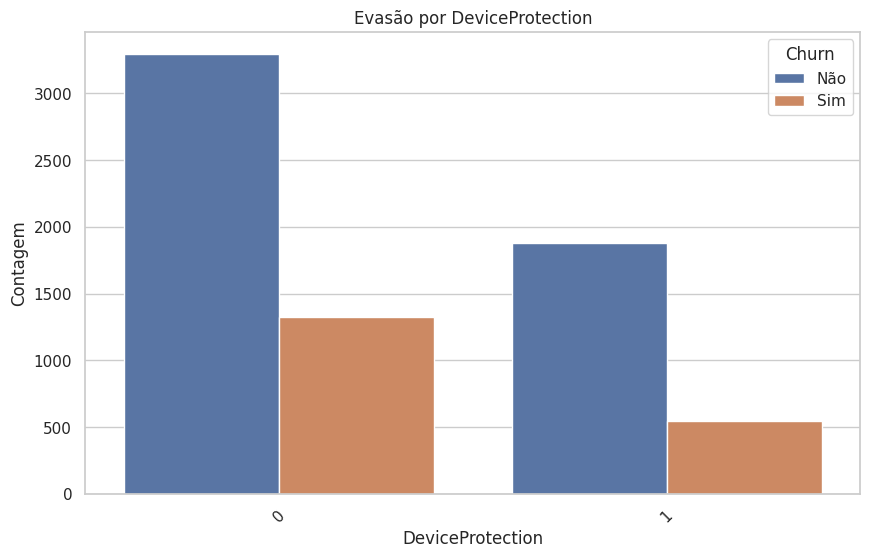

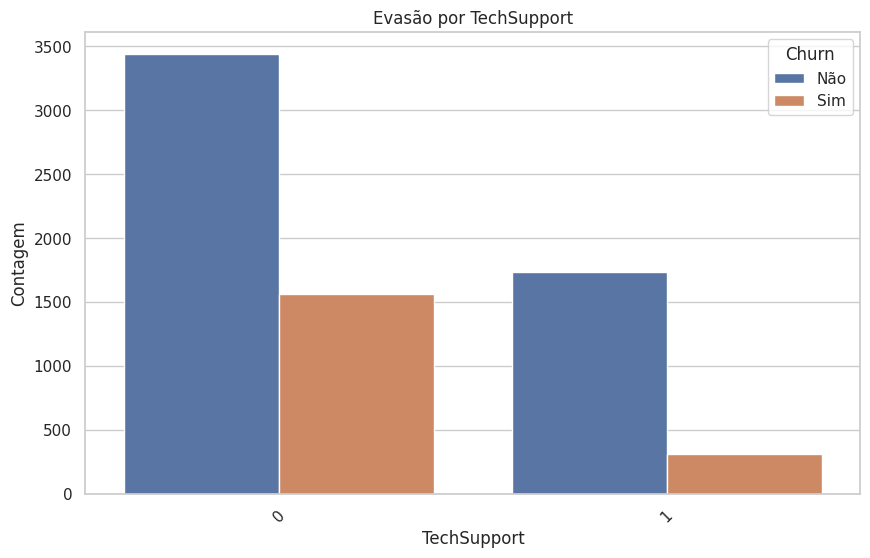

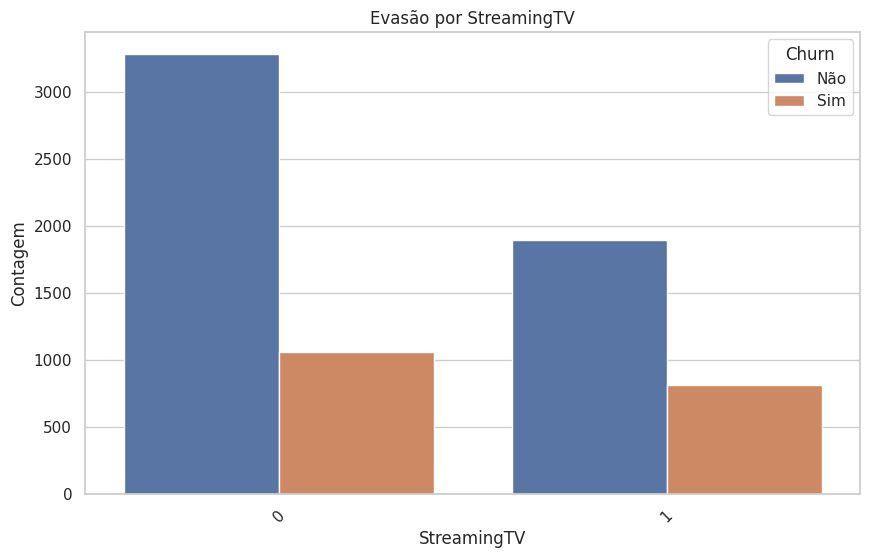

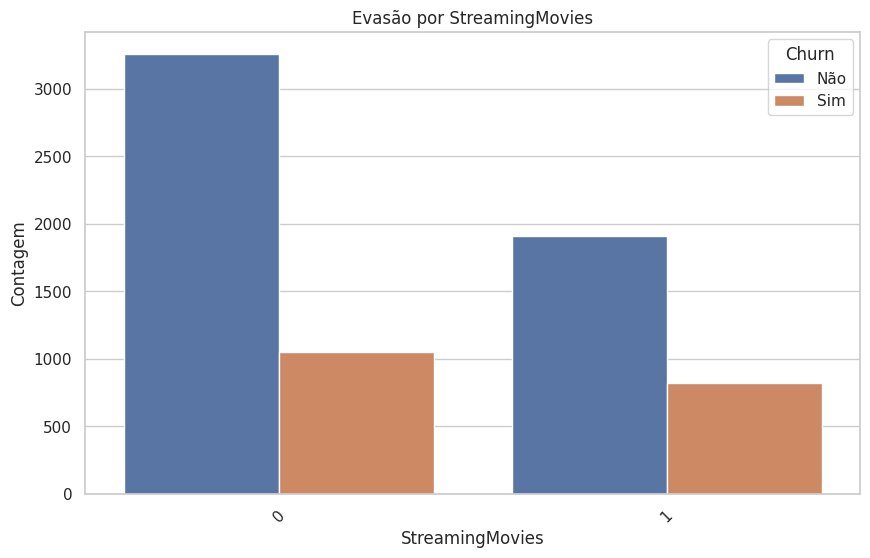

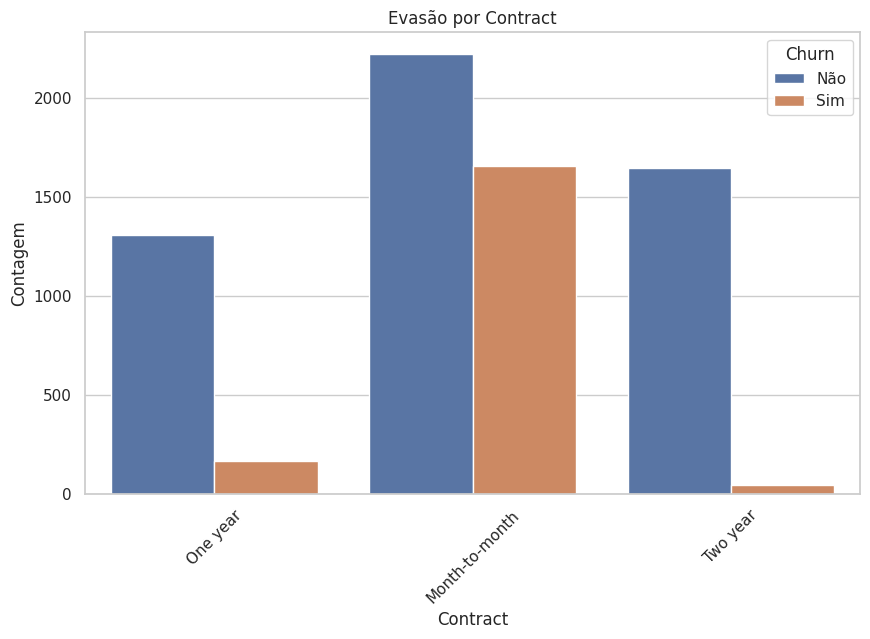

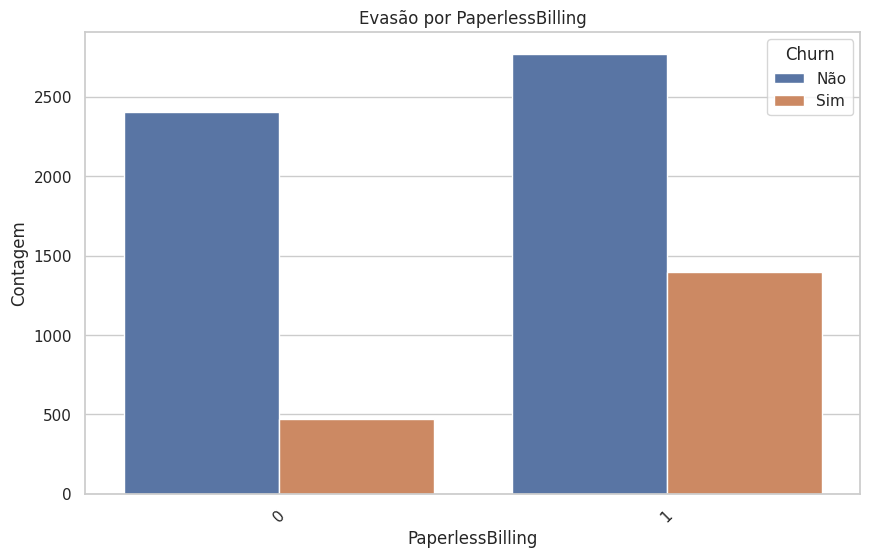

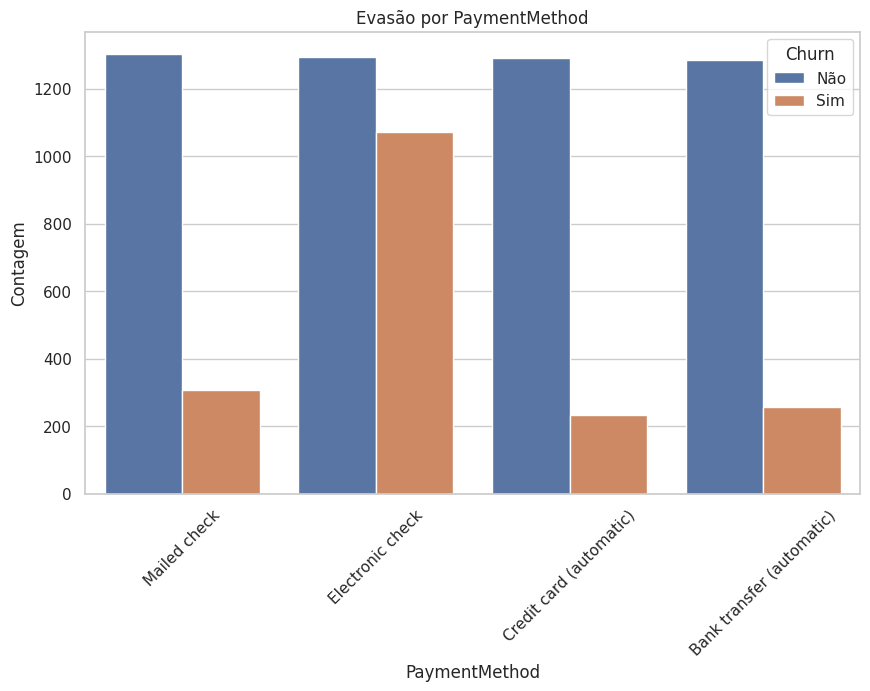

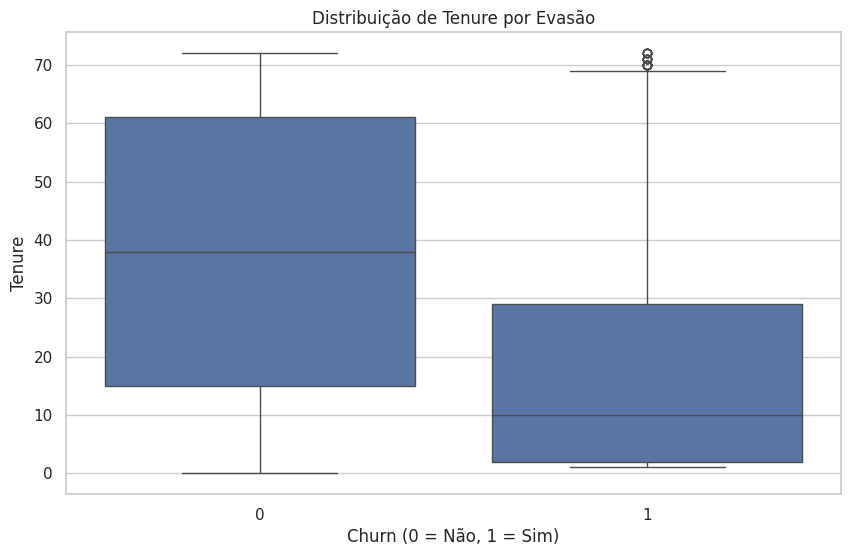

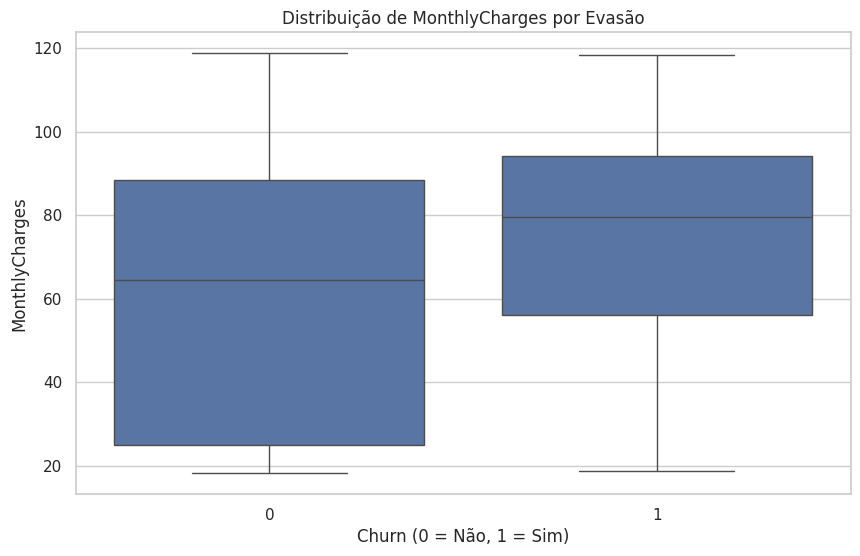

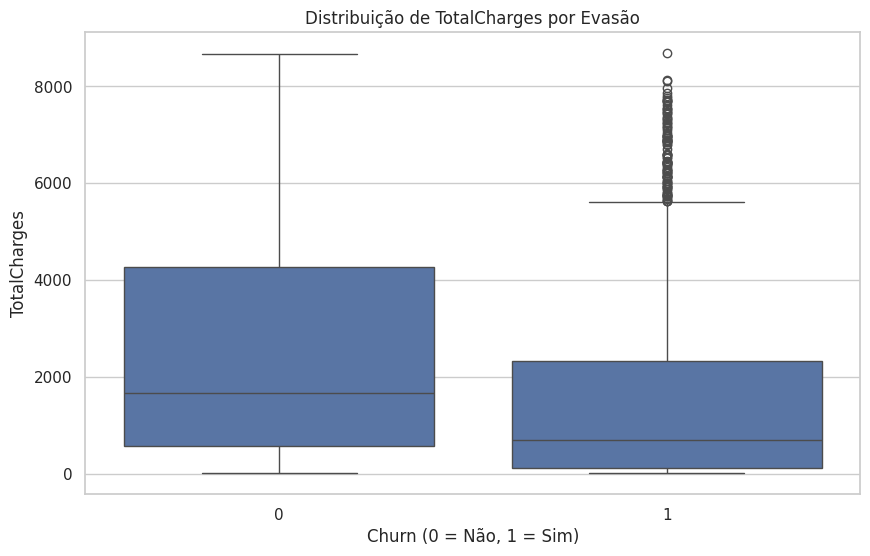

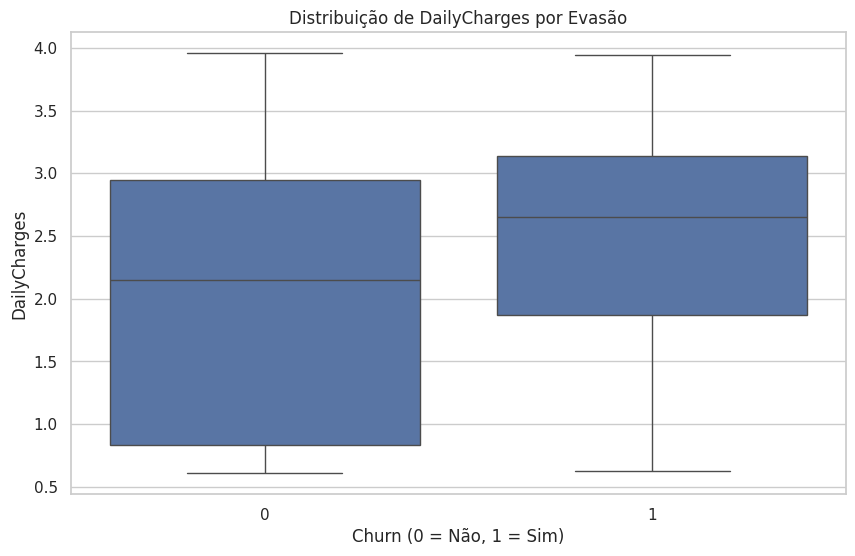

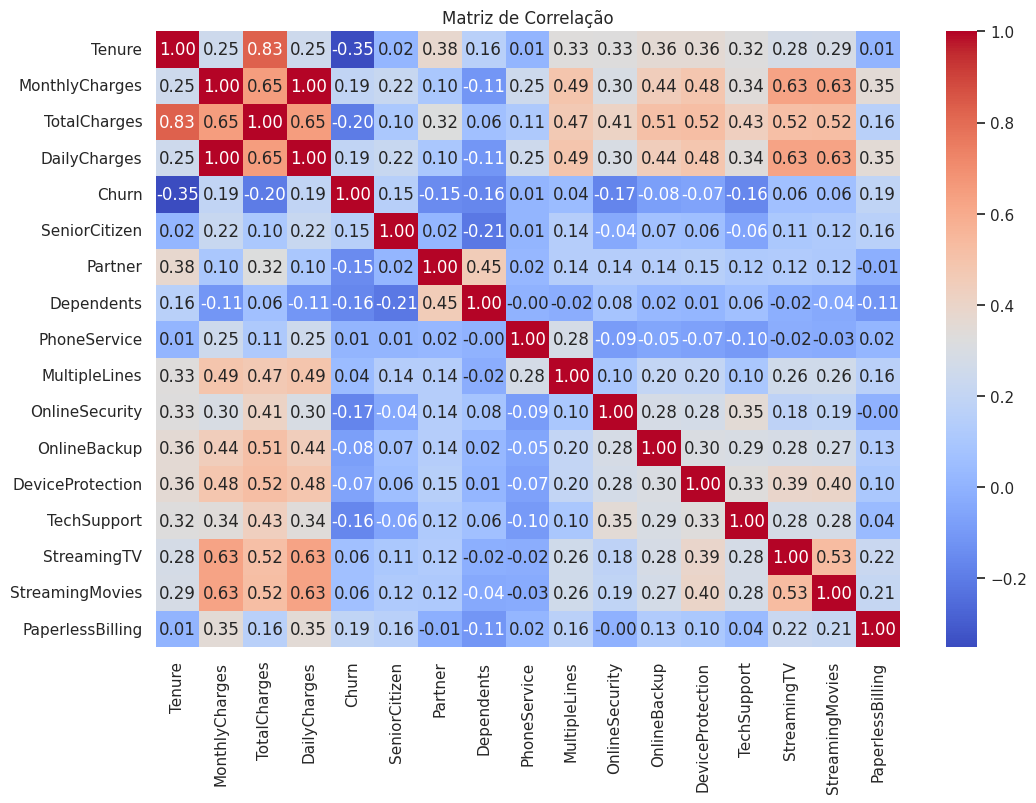

In [10]:
# 📊 Carga e Análise
# Estatísticas descritivas para variáveis numéricas
numeric_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']
print("\nEstatísticas descritivas:")
print(df[numeric_columns].describe())

# Distribuição de Evasão
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

# Percentual de evasão
churn_rate = df['Churn'].mean() * 100
print(f"Taxa de evasão: {churn_rate:.2f}%")

# Evasão por Variáveis Categóricas
categorical_vars = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'Evasão por {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['Não', 'Sim'])
    plt.show()

# Evasão por Variáveis Numéricas
for var in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'Distribuição de {var} por Evasão')
    plt.xlabel('Churn (0 = Não, 1 = Sim)')
    plt.ylabel(var)
    plt.show()

# Análise de Correlação
corr_columns = numeric_columns + ['Churn', 'SeniorCitizen', 'Partner', 'Dependents',
                                 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
corr_matrix = df[corr_columns].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

#📄Relatorio Final

In [11]:
# 📄 Relatório Final
print("""
Relatório Final
==============

Introdução
----------
O objetivo desta análise é investigar os fatores que contribuem para a evasão de clientes (Churn) na Telecom X. A evasão impacta diretamente a receita e a reputação da empresa. Utilizamos dados da API para realizar uma análise exploratória de dados (EDA) e identificar padrões que orientem estratégias de retenção.

Limpeza e Tratamento de Dados
-----------------------------
1. Extração: Dados foram extraídos da API e convertidos para um DataFrame Pandas.
2. Inconsistências:
   - Valores vazios em `Churn` foram removidos.
   - Colunas numéricas (`MonthlyCharges`, `TotalCharges`) foram convertidas para float.
   - Valores como "No phone service" e "No internet service" foram substituídos por "No".
3. Transformação:
   - Criada a coluna `DailyCharges` (`MonthlyCharges` / 30).
   - Variáveis binárias convertidas para 0 e 1.
   - Colunas renomeadas (ex.: `customer.tenure` para `Tenure`).

Análise Exploratória de Dados
----------------------------
1. Distribuição de Evasão:
   - Taxa de evasão: {:.2f}%.
   - Contratos de curto prazo (Month-to-month) têm maior churn.
2. Variáveis Categóricas:
   - Clientes sem `OnlineSecurity` ou `TechSupport` churnam mais.
   - Método de pagamento `Electronic check` está associado a maior evasão.
   - Clientes com `Fiber optic` churnam mais que os com `DSL`.
3. Variáveis Numéricas:
   - Menor `Tenure` está associado a maior churn.
   - `MonthlyCharges` altos aumentam a evasão.
   - `DailyCharges` reforça a relação entre custo e churn.
4. Correlações:
   - `Tenure` tem forte correlação negativa com `Churn`.
   - `MonthlyCharges` e serviços como `StreamingTV` têm correlação positiva com `Churn`.

Conclusões e Insights
---------------------
- Contratos de Longo Prazo: Contratos de um ou dois anos reduzem o churn.
- Serviços Adicionais: Ausência de `OnlineSecurity` e `TechSupport` aumenta a evasão.
- Custo: Altos `MonthlyCharges` estão ligados a maior churn.
- Método de Pagamento: `Electronic check` está correlacionado com maior evasão.

Recomendações
-------------
1. Incentivar Contratos Longos: Oferecer descontos para contratos de um ou dois anos.
2. Promover Serviços Adicionais: Campanhas para `OnlineSecurity` e `TechSupport`.
3. Revisar Preços: Criar planos acessíveis ou pacotes promocionais.
4. Automatizar Pagamentos: Incentivar métodos automáticos (`Bank transfer`, `Credit card`).
5. Segmentação: Focar em clientes com baixo `Tenure` com ações personalizadas.
""".format(churn_rate))


Relatório Final

Introdução
----------
O objetivo desta análise é investigar os fatores que contribuem para a evasão de clientes (Churn) na Telecom X. A evasão impacta diretamente a receita e a reputação da empresa. Utilizamos dados da API para realizar uma análise exploratória de dados (EDA) e identificar padrões que orientem estratégias de retenção.

Limpeza e Tratamento de Dados
-----------------------------
1. Extração: Dados foram extraídos da API e convertidos para um DataFrame Pandas.
2. Inconsistências:
   - Valores vazios em `Churn` foram removidos.
   - Colunas numéricas (`MonthlyCharges`, `TotalCharges`) foram convertidas para float.
   - Valores como "No phone service" e "No internet service" foram substituídos por "No".
3. Transformação:
   - Criada a coluna `DailyCharges` (`MonthlyCharges` / 30).
   - Variáveis binárias convertidas para 0 e 1.
   - Colunas renomeadas (ex.: `customer.tenure` para `Tenure`).

Análise Exploratória de Dados
----------------------------
1. Di